In [31]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
subjects = {}
subjectslist = ['Subject2','Subject3','Subject4','Subject7','Subject8','Subject9','Subject10','Subject11','Subject12']
for n in subjectslist:
    file = n + '.pkl'
    fileopen = open(file, 'rb')
    subjects[n] = pickle.load(fileopen)
    fileopen.close()
    trialnames = list(set(subjects[n].keys()))

In [42]:
trials = ['FACTORY','D50','D100','D150']
paramnames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is float]
for subject in subjectslist:
    for trial in trials:
        if not subjects[subject][trial]:
            subjectslist.remove(subject)
            print('WARNING: %s has no trial for %s, subject has been removed from analysis.' %(subject,trial))
print('Number parameters:')
print(sorted(paramnames))
vectornames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is not float]
print('Vector parameters:')
print(sorted(vectornames))

Number parameters:
['LMaxtoeZ', 'LMintoeZ', 'LeftFoffFraction', 'LeftSpeed', 'LeftSpeedCalc', 'LeftStepLen', 'LeftStepTime', 'LeftStrideLen', 'RightFoffFraction', 'RightSpeed', 'RightSpeedCalc', 'RightStepLen', 'RightStepTime', 'RightStrideLen']
Vector parameters:
['AffectedSide', 'Frames', 'LANKX', 'LANKY', 'LANKZ', 'LASIX', 'LASIY', 'LASIZ', 'LAbsAnkleAngleX', 'LAbsAnkleAngleY', 'LAbsAnkleAngleZ', 'LAnkleAnglesX', 'LAnkleAnglesY', 'LAnkleAnglesZ', 'LFootProgressAnglesX', 'LFootProgressAnglesY', 'LFootProgressAnglesZ', 'LHEEX', 'LHEEY', 'LHEEZ', 'LHipAnglesX', 'LHipAnglesY', 'LHipAnglesZ', 'LKNEX', 'LKNEY', 'LKNEZ', 'LKneeAnglesX', 'LKneeAnglesY', 'LKneeAnglesZ', 'LPSIX', 'LPSIY', 'LPSIZ', 'LPelvisAnglesX', 'LPelvisAnglesY', 'LPelvisAnglesZ', 'LTHIX', 'LTHIY', 'LTHIZ', 'LTIBX', 'LTIBY', 'LTIBZ', 'LTOEX', 'LTOEY', 'LTOEZ', 'LeftAnkleAngle', 'RANKX', 'RANKY', 'RANKZ', 'RASIX', 'RASIY', 'RASIZ', 'RAbsAnkleAngleX', 'RAbsAnkleAngleY', 'RAbsAnkleAngleZ', 'RAnkleAnglesX', 'RAnkleAnglesY', 'R

In [43]:
for subject in subjectslist:
    for trial in trials:
        for side in ['L','R']:
            try:
                toe = subjects[subject][trial][side+'TOEZ']
                subjects[subject][trial][side+'MaxtoeZ'] = max(toe[int(len(toe)*0.2):int(len(toe)*0.8)]) - min(toe)
                subjects[subject][trial][side+'MintoeZ'] = min(toe[int(len(toe)*0.2):int(len(toe)*0.8)]) - min(toe)
            except KeyError:
                continue

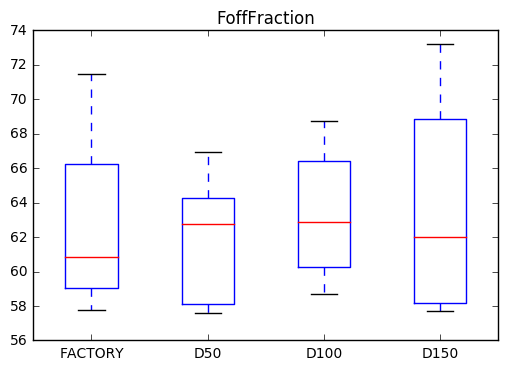

In [44]:
analysis = 'FoffFraction'
data = [[] for _ in range(len(trials))]
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    fesside = subjects[subject][trials[0]]['AffectedSide']
    for trialnum in range(len(trials)):
        try:
            trial = trials[trialnum]
            data[trialnum].append(subjects[subject][trial][fesside+analysis])
        except KeyError:
            continue

%matplotlib inline
box = plt.boxplot(data, labels=trials)
plt.title(analysis)

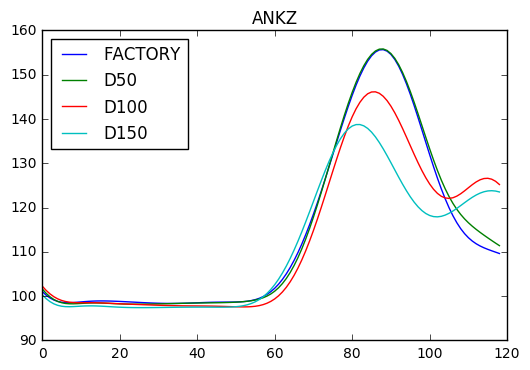

In [45]:
# make list of lists: lists 1->len(subjectslist) for trial 1, next set for trial 2, etc.
vector = 'ANKZ'
array = [[] for _ in range(len(subjectslist)*len(trials))]
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    fesside = subjects[subject][trials[0]]['AffectedSide'][0]
    for trialnum in range(len(trials)):
        trial = trials[trialnum]
        array[subjectnum+(trialnum*len(subjectslist))] = subjects[subject][trial][fesside+vector]

# make all lists same length
shortest = len(min(array,key=len))
for n in range(len(array)):
    line = array[n]
    extra = int(shortest/len(line))
    if extra >1:
        del line[::extra]
    array[n] = line[:shortest]

# average subjects in each trial
avg_per_trial = [[] for _ in range(len(trials))]
for trialnum in range(len(trials)):
    trial = trials[trialnum]
    for n in range(len(array[0])):
        trialpoint = [array[x+trialnum*len(subjectslist)][n] for x in range(len(subjectslist))]
        avg_per_trial[trialnum].append(sum(trialpoint)/len(trialpoint))

# plot it
lgnd = [0]*len(trials)
for trialnum in range(len(trials)):
    plt.plot(avg_per_trial[trialnum], label=trials[trialnum])
plt.legend(loc=2)
plt.title(vector)

In [28]:
debug

> <ipython-input-27-f95dcddb1edc>(26)<module>()
     24     for n in range(len(array[0])):
     25         trialpoint = [array[x+trialnum*len(subjectslist)][n] for x in range(len(subjectslist))]
---> 26         avg_per_trial[trialnum].append(sum(trialpoint)/len(trialpoint))
     27 
     28 # plot it

ipdb> trialpoint
['del', 76.6305, 100.774, 107.684, 'del', 88.7973, 'del']
ipdb> exit
